In [59]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
# from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from sklearn.linear_model import LinearRegression
from datetime import datetime
import time
import math



In [85]:
df = pd.read_csv("Case_PRB_Europe_Only_true_Steven_Testing_Berat told me to_V0.17.csv")
df = df.groupby("location")
df = df["United Kingdom"]

KeyError: 'Column not found: United Kingdom'

In [83]:
# index = 0
minTime =  1577746800.0

# for group_name, df_group in df:
#     index = 0
#     for row_index, row in df_group.iterrows():
#         time_obj = time.mktime(datetime.strptime(row["date"], "%d/%m/%Y").timetuple())
#         print(row_index)        

#         globalRow = df_group.iloc[row_index, :]
#         print(globalRow)
#         df_group.iloc[row_index, :]["thingy"] = 0

# df.to_csv("test.csv")
#         # new_time = round((time_obj - minTime)/86400)
        # print(df["Albania"])
df["day_int"] = df["date"]
df["day_int"] = df["day_int"].apply(lambda x: time.mktime(datetime.strptime(x, "%d/%m/%Y").timetuple()))
df["day_int"] = df["day_int"].apply(lambda x: round((float(x) - minTime)/86400))
df.to_csv("Case_PRB_Europe_Only_true_Steven_Testing_Berat told me to_V0.17.csv")



In [108]:
df = pd.read_csv("Case_PRB_Europe_Only_true_Steven_Testing_Berat told me to_V0.17.csv")
df = df.groupby("location")
df = df.get_group("Austria")

xKey = "day_int"
yKey = "total_cases"

deaths_X = df.iloc[:, df.columns.get_loc(xKey)].values.reshape(-1, 1)
corr_Y = df.iloc[:, df.columns.get_loc(yKey)].values.reshape(-1, 1)

In [106]:
linear_regressor = LinearRegression()
linear_regressor.fit(deaths_X, corr_Y)
Y_pred = linear_regressor.predict(deaths_X)

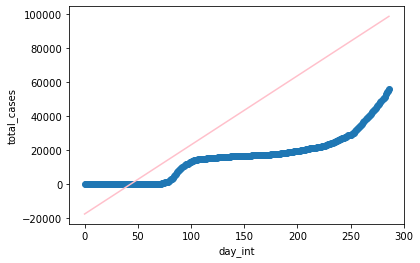

In [109]:
plt.scatter(deaths_X, corr_Y)
plt.plot(deaths_X, Y_pred, color="pink")
plt.xlabel(xKey)
plt.ylabel(yKey)
plt.show()